<a href="https://colab.research.google.com/github/issacridhin/LabWorks/blob/DL/2348546_Lab1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **First Question**

In [ ]:
#importing the packages
import numpy as np
import matplotlib.pyplot as plt

**Perceptron Class Definition**

shows the functionality of a single perceptron

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            total_errors = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                total_errors += np.abs(error)
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            if total_errors == 0:
                break
        print("Final weights of the Perceptron:", self.weights)
        print("Total errors after training the perceptron:", total_errors)

**Defining Training Data for Boolean Functions**

In [ ]:
# AND function
and_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_labels = np.array([0, 0, 0, 1])

# OR function
or_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

# NAND function
nand_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
nand_labels = np.array([1, 1, 1, 0])

**Creating perceptron for each boolean function**

In [ ]:
and_perceptron = Perceptron(2)
or_perceptron = Perceptron(2)
nand_perceptron = Perceptron(2)


**Assigning Weights Manually**

In [ ]:
and_perceptron.weights = np.array([-0.4, 0.4, 0.4])
or_perceptron.weights = np.array([-0.4, 0.4, 0.4])
nand_perceptron.weights = np.array([0.4, -0.4, -0.4])


**Displaying Initial Errors before Training**

In [ ]:
print("Initial weights and errors of the Perceptron:")
print("AND perceptron:")
and_errors = sum([1 for inputs, label in zip(and_inputs, and_labels) if and_perceptron.predict(inputs) != label])
print("Errors:", and_errors)
print("OR perceptron:")
or_errors = sum([1 for inputs, label in zip(or_inputs, or_labels) if or_perceptron.predict(inputs) != label])
print("Errors:", or_errors)
print("NAND perceptron:")
nand_errors = sum([1 for inputs, label in zip(nand_inputs, nand_labels) if nand_perceptron.predict(inputs) != label])
print("Errors:", nand_errors)

Initial weights and errors of the Perceptron:
AND perceptron:
Errors: 2
OR perceptron:
Errors: 0
NAND perceptron:
Errors: 0


**Train Perceptrons**

In [ ]:
print("\nTraining the Perceptron")
and_perceptron.train(and_inputs, and_labels)
or_perceptron.train(or_inputs, or_labels)
nand_perceptron.train(nand_inputs, nand_labels)


Training the Perceptron
Final weights of the Perceptron: [-0.5  0.4  0.3]
Total errors after training the perceptron: 0
Final weights of the Perceptron: [-0.4  0.4  0.4]
Total errors after training the perceptron: 0
Final weights of the Perceptron: [ 0.4 -0.4 -0.4]
Total errors after training the perceptron: 0


# **Second Question**

Global Minima of f(x) = 1.0000048047013674
Number of iterations taken to identify the global minima: 59


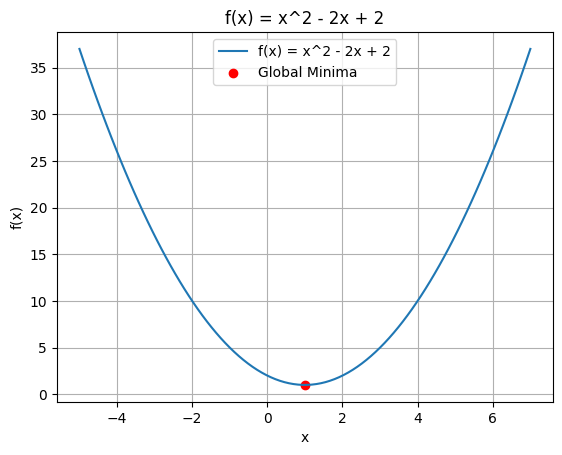

In [ ]:
# Define the function
def f(x):
    return x**2 - 2*x + 2

# Define the derivative of the function
def f_derivative(x):
    return 2*x - 2

# Gradient Descent algorithm
def gradient_descent(f_derivative, learning_rate, precision):
    x = np.random.rand() * 10  # Random initial guess
    iterations = 0
    while True:
        gradient = f_derivative(x)
        new_x = x - learning_rate * gradient
        if abs(new_x - x) < precision:
            break
        x = new_x
        iterations += 1
    return x, iterations

# Perform gradient descent
learning_rate = 0.1
precision = 1e-6
minima, iterations = gradient_descent(f_derivative, learning_rate, precision)
print("Global Minima of f(x) =", minima)
print("Number of iterations taken to identify the global minima:", iterations)

# Visualize the function and the minima
x = np.linspace(-5, 7, 100)
plt.plot(x, f(x), label='f(x) = x^2 - 2x + 2')
plt.scatter(minima, f(minima), color='red', label='Global Minima')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = x^2 - 2x + 2')
plt.legend()
plt.grid(True)
plt.show()